# Assignment 3 : Abalone dataset age prediction

## Problem statement

Download Abalone dataset. (URL: http://archive.ics.uci.edu/ml/datasets/Abalone)
Data set has total 8 Number of Attributes.
Sex nominal M, F, and I (infant)
 Length continuous mm Longest shell measurement
 Diameter continuous mm perpendicular to length
 Height continuous mm with meat in shell
 Whole weight continuous grams whole abalone
 Shucked weight continuous grams weight of meat
 Viscera weight continuous grams gut weight (after bleeding)
 Shell weight continuous grams after being dried
 Rings (age/class of abalone)
Load the data from data file and split it into training and test datasets. Summarize
the properties in the training dataset. The number of rings is the value to predict:
either as a continuous value or as a classification problem.
Predict the age of abalone from physical measurements using linear regression or
predict ring class as classification problem


In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics 


In [2]:
df = pd.read_csv("abalone.csv")


In [3]:
df.shape

(4177, 9)

In [4]:
df.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [6]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
638,I,0.440,0.345,0.120,0.4870,0.1965,0.1080,0.1600,14
3880,I,0.380,0.300,0.100,0.2860,0.1305,0.0560,0.0900,7
309,M,0.570,0.435,0.145,0.9055,0.3925,0.2355,0.2750,10
2510,I,0.420,0.320,0.100,0.3400,0.1745,0.0500,0.0945,8
1878,I,0.545,0.425,0.140,0.8145,0.3050,0.2310,0.2440,10


In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [30]:
#get one hot encoding for SEX
df = pd.get_dummies(df)


## Spiting DataSet 

In [35]:
y = df["Rings"]
X = df.drop(columns="Rings")


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Modeling

### KNN 

In [16]:

knn = KNeighborsClassifier(n_neighbors=3)
#Training the model.
knn.fit(X_train, y_train)
#Predict test data set.
y_pred = knn.predict(X_test)
#Checking performance 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage



21.650717703349283












### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_Pred = model.predict(X_test)
y_Pred

array([ 9.578125 , 14.5234375, 10.75     ,  5.296875 ,  8.296875 ,
       10.90625  , 11.3125   , 13.9765625, 13.609375 , 13.2421875,
        7.5546875,  9.2421875, 14.0703125, 10.40625  , 10.3828125,
       11.8359375,  5.0625   , 12.484375 ,  9.1875   , 11.2421875,
       14.2890625, 13.1953125, 14.265625 ,  8.4921875,  7.5390625,
       13.6875   ,  6.921875 ,  9.6953125, 12.390625 ,  9.671875 ,
       12.0390625,  8.359375 ,  7.6875   ,  8.5546875,  9.0234375,
       13.046875 ,  6.       , 10.921875 ,  9.84375  ,  9.484375 ,
       10.359375 , 13.0234375,  5.421875 ,  6.234375 ,  6.5703125,
       14.4453125,  9.984375 , 10.21875  ,  8.4765625,  9.234375 ,
        8.859375 ,  7.8125   , 10.0078125, 10.7890625,  8.671875 ,
       11.640625 , 10.3125   ,  9.2734375,  9.796875 , 14.875    ,
       11.0234375,  5.9375   ,  8.1484375, 11.90625  , 13.75     ,
       10.859375 , 12.4140625, 13.0703125, 11.171875 , 16.0390625,
       13.109375 ,  5.421875 , 11.640625 ,  7.7578125,  7.1562

In [34]:
model.score(X_train,y_train)


0.5350404295535545

In [23]:
model.score(X_test,y_test)


0.5413911090404817

NameError: name 'plt' is not defined

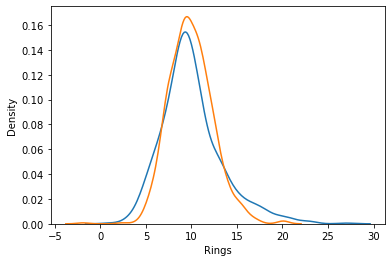

In [29]:
import seaborn as sns
sns.kdeplot(y_test,label='rings actual')
sns.kdeplot(y_pred,label='rings predicted')
plt.legend()